In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
%matplotlib inline

df=pd.read_csv('dataset_facebook.csv',sep=";") # Ziel: wie kann ich Likes und Shares optimieren?
                                               # wir versuchen Likes vorherzusagen

# Remove some outliers
df=df[((df['like'] >0) & (df['like'] <1000))]
df.dropna(inplace=True)

df.dropna(inplace=True)
df[[ 'Type', 'Post Month','Post Weekday', 'Post Hour' ,'Page total likes','Paid','share','comment','like']].head()


,Type,Post Month,Post Weekday,Post Hour,Page total likes,Paid,share,comment,like
0,Photo,12,4,3,139441,0.0,17.0,4,79.0
1,Status,12,3,10,139441,0.0,29.0,5,130.0
2,Photo,12,3,3,139441,0.0,14.0,0,66.0
4,Photo,12,2,3,139441,0.0,49.0,19,325.0
5,Status,12,1,9,139441,0.0,33.0,1,152.0


In [4]:
# Some first descriptives
df.describe()
#df.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,4.800000e+02,480.000000,480.000000,480.000000,4.800000e+02,480.000000,480.000000,480.00000,480.000000,480.000000,480.000000
mean,123124.054167,1.883333,7.016667,4.154167,7.827083,0.277083,12998.362500,2.716864e+04,884.447917,788.743750,1405.064583,1.504615e+04,6208.835417,591.377083,5.86875,145.935417,24.120833,175.925000
std,16223.292250,0.851704,3.304285,2.035485,4.400287,0.448025,20748.191102,7.084550e+04,895.512096,866.732584,2000.921014,5.333721e+04,6805.029020,577.565430,9.57257,145.609947,20.602359,166.826609
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,24.000000,23.000000,26.000000,5.670000e+02,236.000000,19.000000,0.00000,1.000000,0.000000,2.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3333.500000,5.805000e+03,412.500000,335.000000,513.000000,4.108500e+03,2231.500000,299.500000,1.00000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.000000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,18.500000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,12486.000000,2.120100e+04,1044.500000,938.500000,1438.750000,1.417450e+04,7800.000000,637.500000,7.00000,186.000000,32.000000,225.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,158208.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,48368.000000,4376.000000,103.00000,955.000000,139.000000,1136.000000


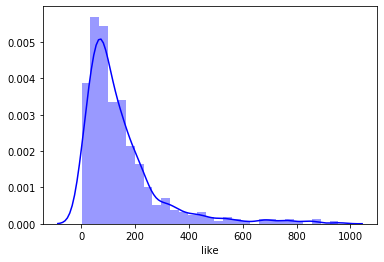

In [5]:
sns.distplot(df['like'], color='blue') # likes distributen

Text(0.5, 0, 'log(like)')

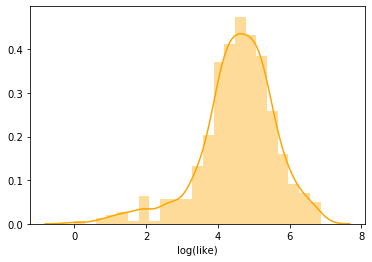

In [6]:
sns.distplot(np.log(df['like']), color='orange') # logarithmic scale of like distribution
plt.xlabel('log(like)')

In [7]:
# Analysis of (highly correlated) independent variables-> like with it self, like and Total Interactons, like and share.....
df.corr()['like'].sort_values(ascending=False)


like                                                                   1.000000
Total Interactions                                                     0.994951
share                                                                  0.759182
Lifetime Post reach by people who like your Page                       0.601694
comment                                                                0.494470
Lifetime People who have liked your Page and engaged with your post    0.468614
Lifetime Engaged Users                                                 0.448494
Lifetime Post Total Reach                                              0.393229
Lifetime Post Consumers                                                0.342882
Lifetime Post Total Impressions                                        0.233881
Lifetime Post Consumptions                                             0.230242
Lifetime Post Impressions by people who have liked your Page           0.196965
Category                                

In [9]:
#df.corr()['Category'].sort_values(ascending=False)

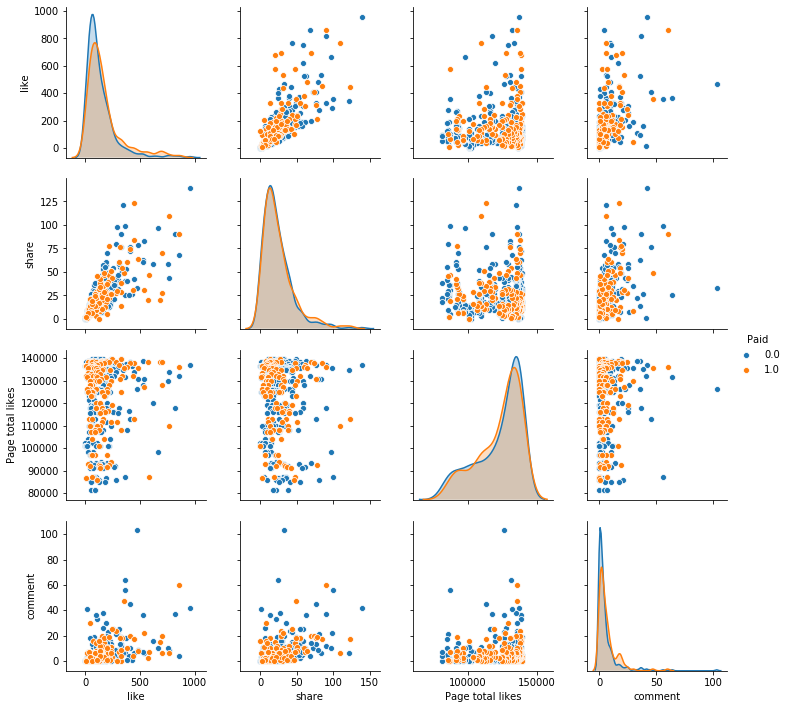

In [11]:
df1 = df[['like','share','Page total likes','comment','Paid']]
df1.Paid.astype('object')

# Metric independent variables سيتم التفريق بين الاعلان المدفوع والغير مدفوع
sns.pairplot(df1, vars=['like','share','Page total likes','comment'] ,hue='Paid') # Plot pairwise relationships in a dataset.
                                                                                  # Variable in ``data`` to map plot aspects to different colors.
  
plt.savefig('Pairplot_Paid.png')

# من الافضل عند النظر التركيز على العناصر فوق القطرية
# note the clearly positive correlation between like and share

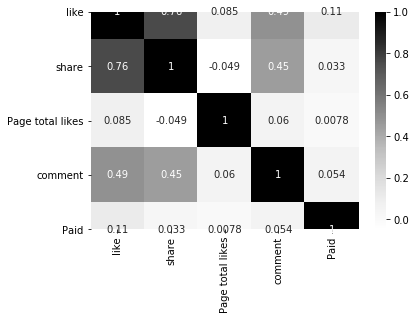

In [12]:
sns.heatmap(df1.corr(), annot=True, cmap='Greys')

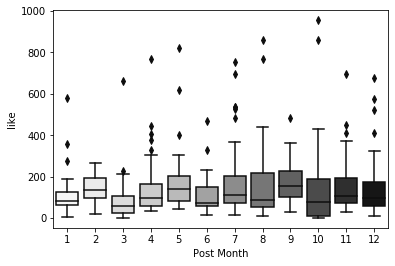

In [13]:
# Categoric independent variables
sns.boxplot(x=df['Post Month'], y=df['like'], palette='Greys') # x-axis months and y-axis number of likes
                                                                

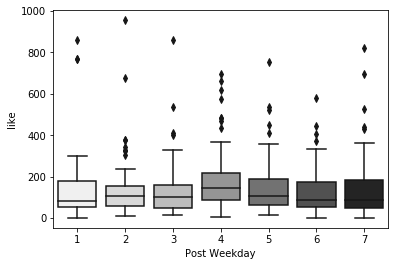

In [14]:
sns.boxplot(x=df['Post Weekday'], y=df['like'], palette='Greys')

## Preprocessing

In [16]:
df1=df.copy()
df1['like']=np.log(df1['like'])
y=df1['like']
X=df1[['Page total likes','Paid' ,'comment', 'share','Type' ]]


from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.3, random_state =3) # training data and test data


# Rescale the data and add Dummy variables
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train_scaled = SC.fit_transform(X_train.drop('Type',axis=1))
X_test_scaled = SC.fit_transform(X_test.drop('Type',axis=1))


X_train_dummies=pd.get_dummies(X_train['Type'].astype(str),
prefix='Category').drop('Category_Video', axis=1)
X_train_dummies.index=range (336)


X_train=pd.concat([pd.DataFrame(X_train_scaled),X_train_dummies], axis=1,ignore_index=True)
X_train.columns=['Page total likes','Paid' ,'comment', 'share',
'Category_Link', 'Category_Photo', 'Category_Status ' ]
y_train.index=range (336)


X_test_dummies=pd.get_dummies(X_test['Type'].astype(str),
prefix='Category').drop('Category_Video', axis=1)
X_test_dummies.index=range (144)


X_test=pd.concat([pd.DataFrame(X_test_scaled),X_test_dummies], axis=1,ignore_index=True)
X_test.columns=['Page total likes','Paid' ,'comment', 'share',
'Category_Link', 'Category_Photo', 'Category_Status ' ]
y_test.index=range (144)


import statsmodels.api as sm
model_sm = sm.OLS(y_train ,sm.add_constant(X_train))
model_sm = model_sm.fit()
print(model_sm.summary ())





                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     53.09
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           2.47e-50
Time:                        12:45:12   Log-Likelihood:                -370.06
No. Observations:                 336   AIC:                             756.1
Df Residuals:                     328   BIC:                             786.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.0300      0.310  

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
from sklearn.linear_model import LinearRegression
model_sk = LinearRegression()
model_sk.fit(X_train , y_train)
print(model_sk.intercept_)
print(model_sk.coef_)

4.030005165457274
[0.10088069 0.0920818  0.09688149 0.71953643 0.20604555 0.5598056
 0.49090662]


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


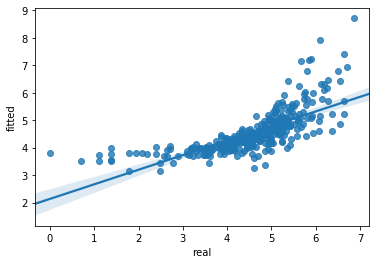

Mean absolute error: 0.49845643106157667
Mean squared error: 0.5298768042598662
Root mean squared error: 0.7279263728289188
AIC: 756.1294842461607
BIC: 786.6663735258663


In [28]:
pred_IS=model_sm.predict(sm.add_constant(X_train)) # In-Sample prediction 
pred_OOS=model_sm.predict(sm.add_constant(X_test)) # Out-of-Sample prediction
from sklearn.metrics import mean_absolute_error , mean_squared_error


# in sample (train data) prediction results
sns.regplot(y_train , pred_IS)
plt.xlabel('real')     # on the x-axis the real y data
plt.ylabel('fitted')   # on the y-axis the predicted y data
plt.show()

print('Mean absolute error: ' + str(mean_absolute_error(y_train ,pred_IS ))) # measn absolute error as cost function
print('Mean squared error: ' + str(mean_squared_error(y_train ,pred_IS )))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_train ,pred_IS ))))
print('AIC: ' + str(model_sm.aic))
print('BIC: ' + str(model_sm.bic))




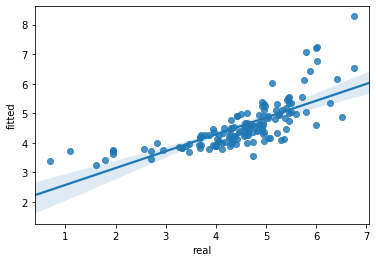

Mean absolute error: 0.49381871287238177
Mean squared error: 0.4979174686697427
Root mean squared error: 0.7056326726206367


In [29]:
# out of sample (test data) prediction results-- better than in sample
sns.regplot(y_test , pred_OOS)
plt.xlabel('real')
plt.ylabel('fitted')
plt.show()
print('Mean absolute error: ' + str(mean_absolute_error(y_test ,pred_OOS )))
print('Mean squared error: ' + str(mean_squared_error(y_test ,pred_OOS )))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_test ,pred_OOS ))))